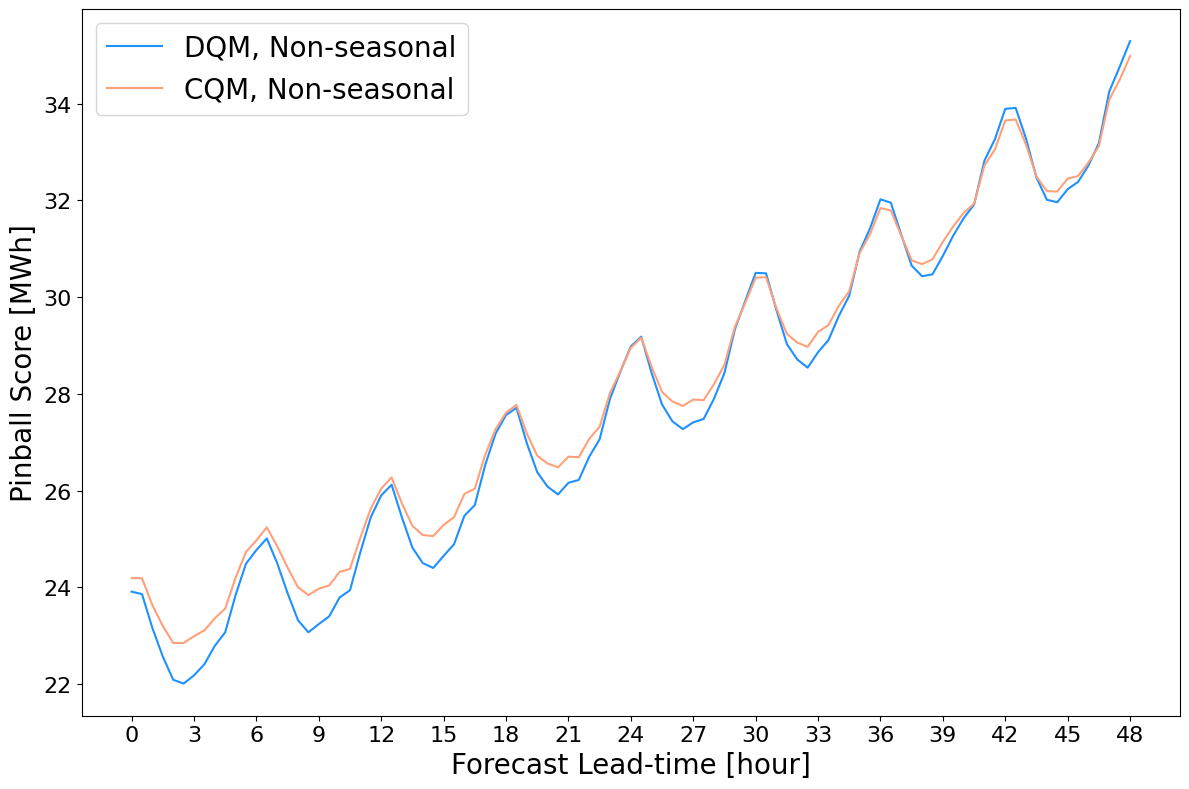

In [2]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

# 共通の関数
def pinball(y, q, alpha):
    return round((y - q) * alpha * (y >= q) + (q - y) * (1 - alpha) * (y < q),2)

def pinball_score(df):
    score = list()
    for qu in range(10, 100, 10):
        pinball_loss = pinball(y=df["total_generation_MWh"], q=df[f"q{qu}"], alpha=qu/100).mean()
        rounded_loss = round(pinball_loss, 2)
        score.append(rounded_loss)
    return round(sum(score)/len(score), 2)

# DQM, Non-Seasonal
modelling_table1 = pd.read_csv("analyzed_data.csv")
modelling_table1['valid_datetime'] = pd.to_datetime(modelling_table1['valid_datetime'])
modelling_table1['ref_datetime'] = pd.to_datetime(modelling_table1['ref_datetime'])
modelling_table1['lead_time'] = modelling_table1['valid_datetime'] - modelling_table1['ref_datetime']
forecast_performance1 = modelling_table1.groupby('lead_time').apply(pinball_score)
forecast_performance1.index = forecast_performance1.index.total_seconds() / (3600)

# CQM, Non-Seasonal
modelling_table2 = pd.read_csv("analyzed_data_sep.csv")
modelling_table2['valid_datetime'] = pd.to_datetime(modelling_table2['valid_datetime'])
modelling_table2['ref_datetime'] = pd.to_datetime(modelling_table2['ref_datetime'])
modelling_table2['lead_time'] = modelling_table2['valid_datetime'] - modelling_table2['ref_datetime']
forecast_performance2 = modelling_table2.groupby('lead_time').apply(pinball_score)
forecast_performance2.index = forecast_performance2.index.total_seconds() / (3600)

# グラフ描画
plt.figure(figsize=(12, 8))
ax = forecast_performance1.plot(label='DQM, Non-seasonal', color='#1E90FF')
forecast_performance2.plot(ax=ax, label='CQM, Non-seasonal', color='#FFA07A')
ax.set_ylabel('Pinball Score [MWh]', fontsize=20)
ax.set_xlabel('Forecast Lead-time [hour]', fontsize=20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=3))
plt.tick_params(axis='both', labelsize=16)
ax.legend(fontsize=20)
plt.tight_layout()
plt.show()

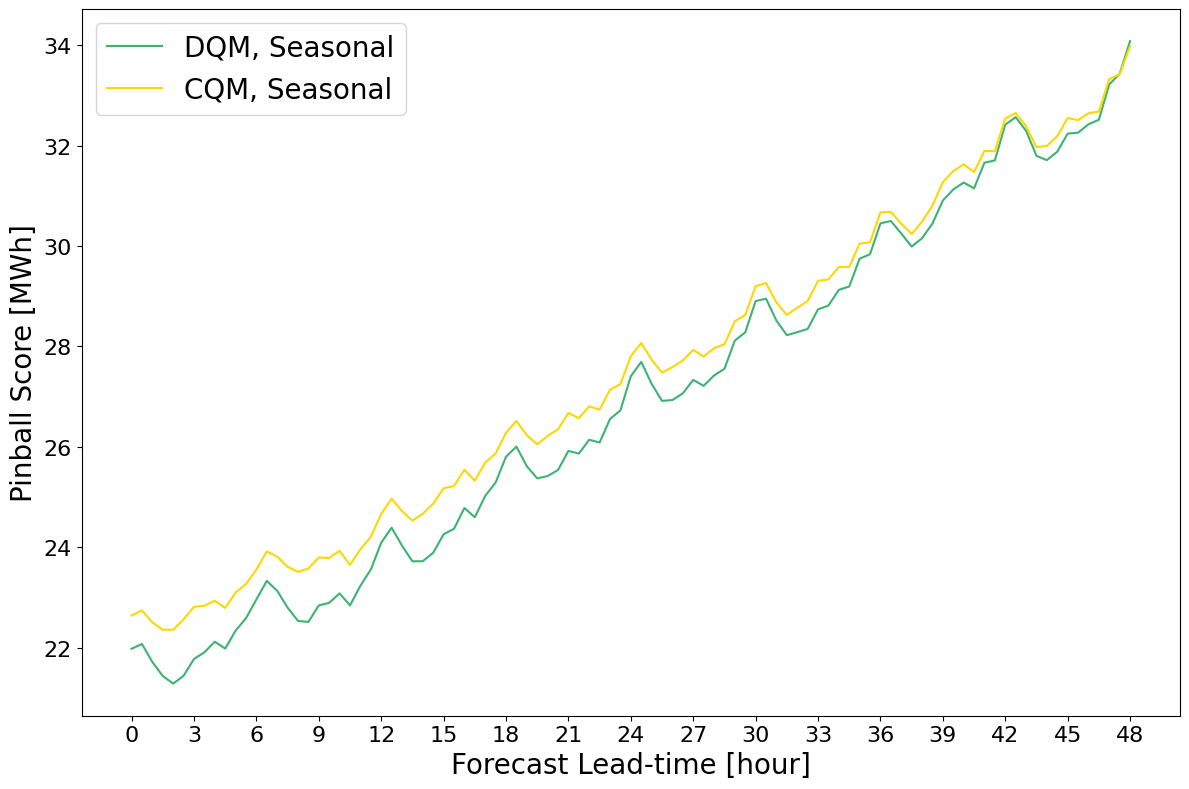

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ピンボール関数
def pinball(y, q, alpha):
    return round((y - q) * alpha * (y >= q) + (q - y) * (1 - alpha) * (y < q),2)

# リードタイムごとのピンボールロスを計算する関数
def pinball_score(df):
    seasons = ['spring', 'summer', 'autumn', 'winter']
    score = []
    for quantile in range(10, 100, 10):
        alpha = quantile / 100
        q = df[[f"{season}_q{quantile}" for season in seasons]].mean(axis=1)
        y = df["total_generation_MWh"]
        pinball_loss = pinball(y, q, alpha).mean()
        score.append(pinball_loss)
    return np.mean(score)

# DQM, Seasonal
modelling_table1 = pd.read_csv("analyzed_data_sea.csv")
modelling_table1['valid_datetime'] = pd.to_datetime(modelling_table1['valid_datetime'])
modelling_table1['ref_datetime'] = pd.to_datetime(modelling_table1['ref_datetime'])
modelling_table1['lead_time'] = (modelling_table1['valid_datetime'] - modelling_table1['ref_datetime']).dt.total_seconds() / 3600
forecast_performance1 = modelling_table1.groupby('lead_time').apply(pinball_score)

# CQM, Seasonal
modelling_table2 = pd.read_csv("analyzed_data_sep_sea.csv")
modelling_table2['valid_datetime'] = pd.to_datetime(modelling_table2['valid_datetime'])
modelling_table2['ref_datetime'] = pd.to_datetime(modelling_table2['ref_datetime'])
modelling_table2['lead_time'] = (modelling_table2['valid_datetime'] - modelling_table2['ref_datetime']).dt.total_seconds() / 3600
forecast_performance2 = modelling_table2.groupby('lead_time').apply(pinball_score)

# グラフの描画
plt.figure(figsize=(12, 8))
ax = forecast_performance1.plot(label='DQM, Seasonal', color='#3CB371')
forecast_performance2.plot(ax=ax, label='CQM, Seasonal', color='#FFD700')
ax.set_ylabel('Pinball Score [MWh]', fontsize=20)
ax.set_xlabel('Forecast Lead-time [hour]', fontsize=20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=3))
plt.tick_params(axis='both', labelsize=16)
ax.legend(fontsize=20)
plt.tight_layout()
plt.show()

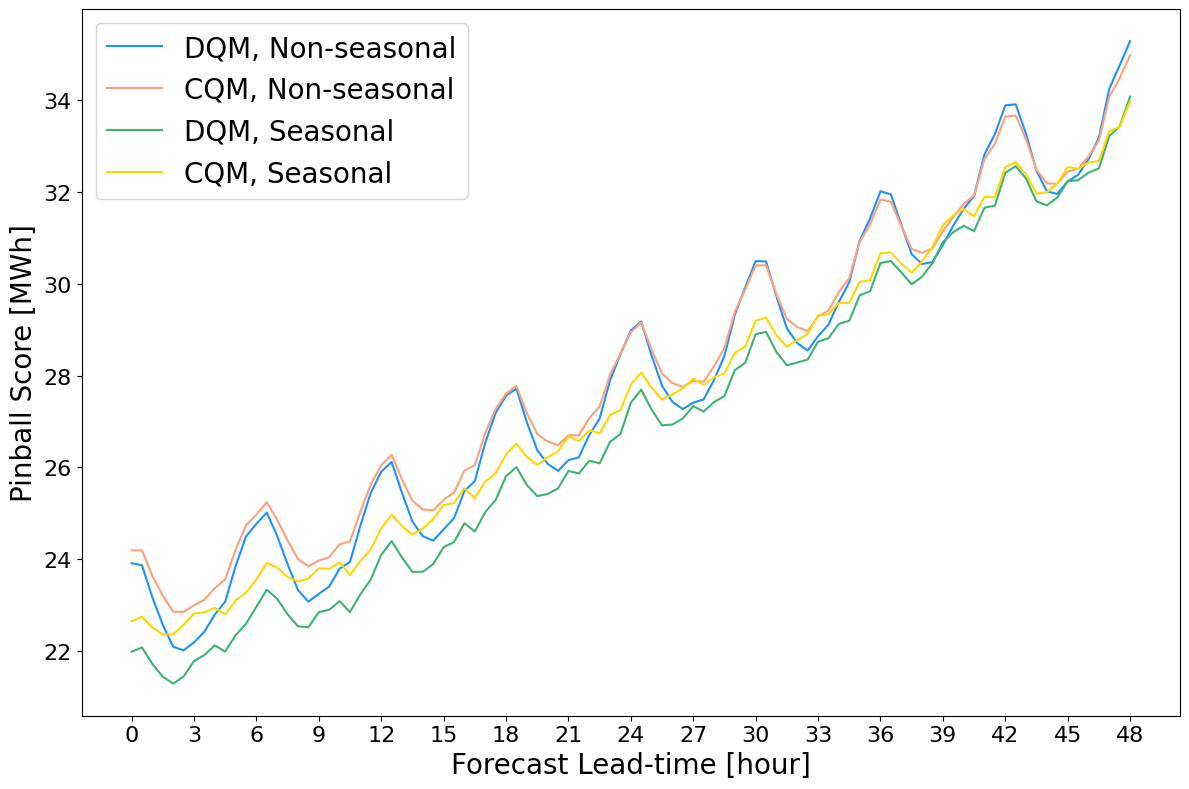

In [3]:
# ピンボールロスを計算する関数
def pinball(y, q, alpha):
    return round((y - q) * alpha * (y >= q) + (q - y) * (1 - alpha) * (y < q),2)

# リードタイムごとのピンボールロスを計算する関数（非季節性）
def pinball_score_non_seasonal(df):
    score = []
    for qu in range(10, 100, 10):
        pinball_loss = pinball(y=df["total_generation_MWh"], q=df[f"q{qu}"], alpha=qu/100).mean()
        score.append(pinball_loss)
    return np.mean(score)

# リードタイムごとのピンボールロスを計算する関数（季節性）
def pinball_score_seasonal(df):
    seasons = ['spring', 'summer', 'autumn', 'winter']
    score = []
    for quantile in range(10, 100, 10):
        alpha = quantile / 100
        q = df[[f"{season}_q{quantile}" for season in seasons]].mean(axis=1)
        y = df["total_generation_MWh"]
        pinball_loss = pinball(y, q, alpha).mean()
        score.append(pinball_loss)
    return np.mean(score)

# データセットの読み込みと処理
# DQM, Non-Seasonal
modelling_table1_ns = pd.read_csv("analyzed_data.csv")
modelling_table1_ns['valid_datetime'] = pd.to_datetime(modelling_table1_ns['valid_datetime'])
modelling_table1_ns['ref_datetime'] = pd.to_datetime(modelling_table1_ns['ref_datetime'])
modelling_table1_ns['lead_time'] = modelling_table1_ns['valid_datetime'] - modelling_table1_ns['ref_datetime']
forecast_performance1_ns = modelling_table1_ns.groupby('lead_time').apply(pinball_score_non_seasonal)
forecast_performance1_ns.index = forecast_performance1_ns.index.total_seconds() / (3600)

# CQM, Non-Seasonal
modelling_table2_ns = pd.read_csv("analyzed_data_sep.csv")
modelling_table2_ns['valid_datetime'] = pd.to_datetime(modelling_table2_ns['valid_datetime'])
modelling_table2_ns['ref_datetime'] = pd.to_datetime(modelling_table2_ns['ref_datetime'])
modelling_table2_ns['lead_time'] = modelling_table2_ns['valid_datetime'] - modelling_table2_ns['ref_datetime']
forecast_performance2_ns = modelling_table2_ns.groupby('lead_time').apply(pinball_score_non_seasonal)
forecast_performance2_ns.index = forecast_performance2_ns.index.total_seconds() / (3600)

# DQM, Seasonal
modelling_table1_s = pd.read_csv("analyzed_data_sea.csv")
modelling_table1_s['valid_datetime'] = pd.to_datetime(modelling_table1_s['valid_datetime'])
modelling_table1_s['ref_datetime'] = pd.to_datetime(modelling_table1_s['ref_datetime'])
modelling_table1_s['lead_time'] = (modelling_table1_s['valid_datetime'] - modelling_table1_s['ref_datetime']).dt.total_seconds() / 3600
forecast_performance1_s = modelling_table1_s.groupby('lead_time').apply(pinball_score_seasonal)

# CQM, Seasonal
modelling_table2_s = pd.read_csv("analyzed_data_sep_sea.csv")
modelling_table2_s['valid_datetime'] = pd.to_datetime(modelling_table2_s['valid_datetime'])
modelling_table2_s['ref_datetime'] = pd.to_datetime(modelling_table2_s['ref_datetime'])
modelling_table2_s['lead_time'] = (modelling_table2_s['valid_datetime'] - modelling_table2_s['ref_datetime']).dt.total_seconds() / 3600
forecast_performance2_s = modelling_table2_s.groupby('lead_time').apply(pinball_score_seasonal)

# グラフの描画
plt.figure(figsize=(12, 8))

# 各曲線の色を選定
colors = {
    'DQM, Non-seasonal': '#1E90FF',  # ドジャーブルー
    'CQM, Non-seasonal': '#FFA07A',  # 明るいサーモンピンク
    'DQM, Seasonal': '#3CB371',      # ミディアムシーグリーン
    'CQM, Seasonal': '#FFD700'       # ゴールド
}

ax = forecast_performance1_ns.plot(label='DQM, Non-seasonal', color=colors['DQM, Non-seasonal'])
forecast_performance2_ns.plot(ax=ax, label='CQM, Non-seasonal', color=colors['CQM, Non-seasonal'])
forecast_performance1_s.plot(ax=ax, label='DQM, Seasonal', color=colors['DQM, Seasonal'])
forecast_performance2_s.plot(ax=ax, label='CQM, Seasonal', color=colors['CQM, Seasonal'])

ax.set_ylabel('Pinball Score [MWh]', fontsize=20)
ax.set_xlabel('Forecast Lead-time [hour]', fontsize=20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=3))
plt.tick_params(axis='both', labelsize=16)
ax.legend(fontsize=20)
plt.tight_layout()
plt.show()


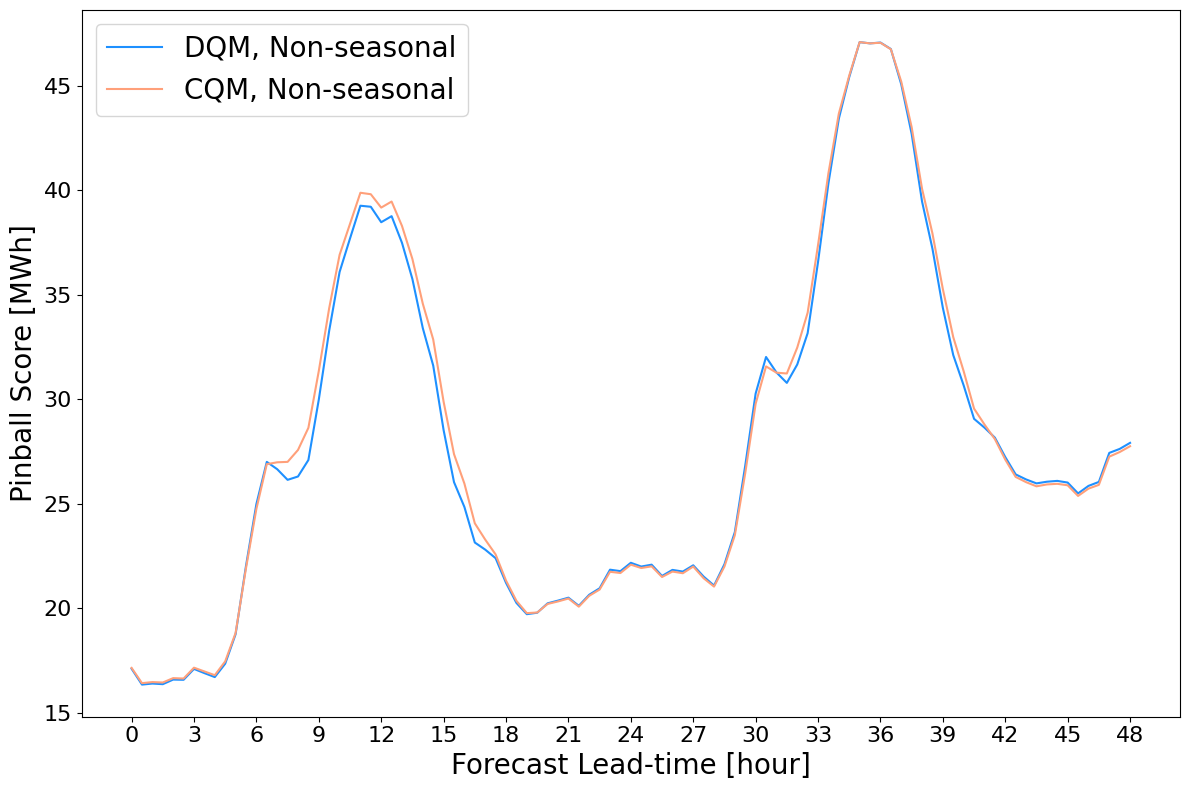

In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

# 共通の関数
def pinball(y, q, alpha):
    return round((y - q) * alpha * (y >= q) + (q - y) * (1 - alpha) * (y < q), 2)

def pinball_score(df):
    score = list()
    for qu in range(10, 100, 10):
        pinball_loss = pinball(y=df["total_generation_MWh"], q=df[f"q{qu}"], alpha=qu/100).mean()
        rounded_loss = round(pinball_loss, 2)
        score.append(rounded_loss)
    return round(sum(score)/len(score), 2)

# DQM, Non-Seasonal
modelling_table1 = pd.read_csv("analyzed_data.csv")
modelling_table1['valid_datetime'] = pd.to_datetime(modelling_table1['valid_datetime'])
modelling_table1['ref_datetime'] = pd.to_datetime(modelling_table1['ref_datetime'])
modelling_table1 = modelling_table1[modelling_table1['ref_datetime'].dt.time == pd.Timestamp('00:00:00').time()]
modelling_table1['lead_time'] = modelling_table1['valid_datetime'] - modelling_table1['ref_datetime']
forecast_performance1 = modelling_table1.groupby('lead_time').apply(pinball_score)
forecast_performance1.index = forecast_performance1.index.total_seconds() / (3600)

# CQM, Non-Seasonal
modelling_table2 = pd.read_csv("analyzed_data_sep.csv")
modelling_table2['valid_datetime'] = pd.to_datetime(modelling_table2['valid_datetime'])
modelling_table2['ref_datetime'] = pd.to_datetime(modelling_table2['ref_datetime'])
modelling_table2 = modelling_table2[modelling_table2['ref_datetime'].dt.time == pd.Timestamp('00:00:00').time()]
modelling_table2['lead_time'] = modelling_table2['valid_datetime'] - modelling_table2['ref_datetime']
forecast_performance2 = modelling_table2.groupby('lead_time').apply(pinball_score)
forecast_performance2.index = forecast_performance2.index.total_seconds() / (3600)

# グラフ描画
plt.figure(figsize=(12, 8))
ax = forecast_performance1.plot(label='DQM, Non-seasonal', color='#1E90FF')
forecast_performance2.plot(ax=ax, label='CQM, Non-seasonal', color='#FFA07A')
ax.set_ylabel('Pinball Score [MWh]', fontsize=20)
ax.set_xlabel('Forecast Lead-time [hour]', fontsize=20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=3))
plt.tick_params(axis='both', labelsize=16)
ax.legend(fontsize=20)
plt.tight_layout()
plt.show()

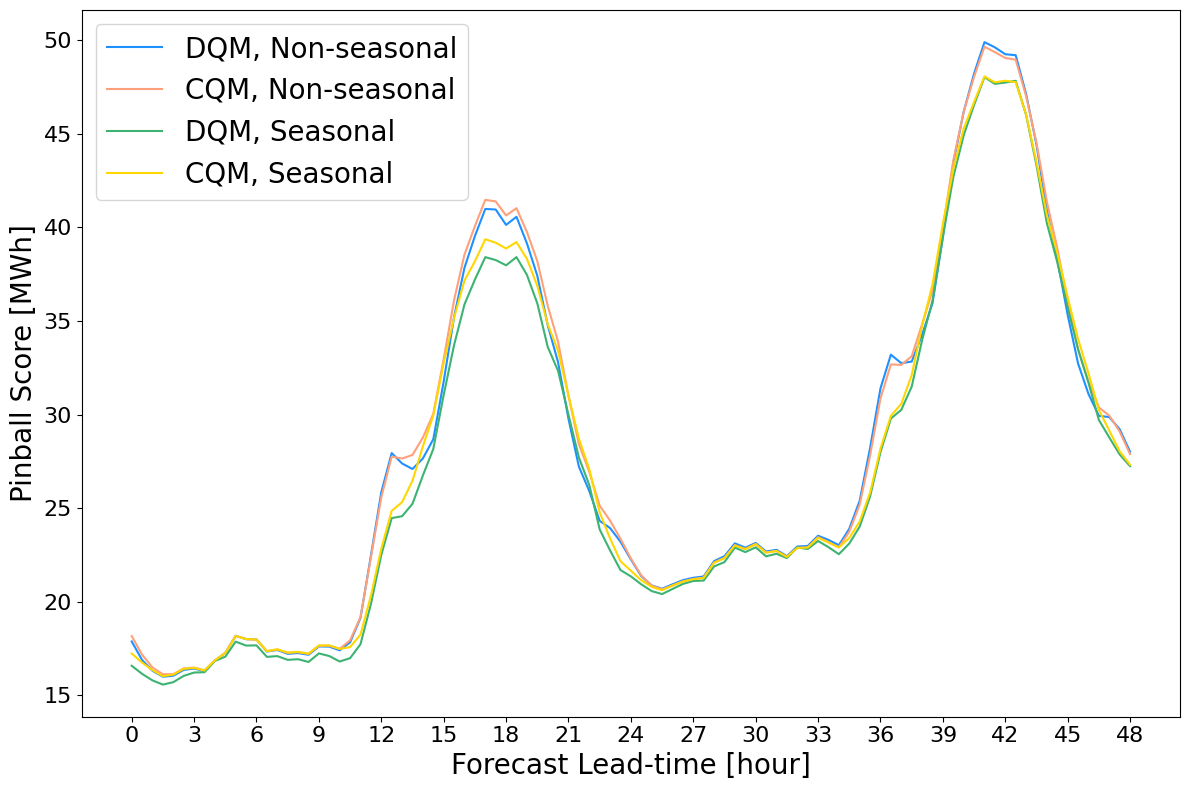

In [5]:
# ピンボールロスを計算する関数
def pinball(y, q, alpha):
    return round((y - q) * alpha * (y >= q) + (q - y) * (1 - alpha) * (y < q),2)

# リードタイムごとのピンボールロスを計算する関数（非季節性）
def pinball_score_non_seasonal(df):
    score = []
    for qu in range(10, 100, 10):
        pinball_loss = pinball(y=df["total_generation_MWh"], q=df[f"q{qu}"], alpha=qu/100).mean()
        score.append(pinball_loss)
    return np.mean(score)

# リードタイムごとのピンボールロスを計算する関数（季節性）
def pinball_score_seasonal(df):
    seasons = ['spring', 'summer', 'autumn', 'winter']
    score = []
    for quantile in range(10, 100, 10):
        alpha = quantile / 100
        q = df[[f"{season}_q{quantile}" for season in seasons]].mean(axis=1)
        y = df["total_generation_MWh"]
        pinball_loss = pinball(y, q, alpha).mean()
        score.append(pinball_loss)
    return np.mean(score)


# データセットの読み込みと処理
# DQM, Non-Seasonal
modelling_table1_ns = pd.read_csv("analyzed_data.csv")
modelling_table1_ns['valid_datetime'] = pd.to_datetime(modelling_table1_ns['valid_datetime'])
modelling_table1_ns['ref_datetime'] = pd.to_datetime(modelling_table1_ns['ref_datetime'])
modelling_table1_ns = modelling_table1_ns[modelling_table1_ns['ref_datetime'].dt.time == pd.Timestamp('18:00:00').time()]
modelling_table1_ns['lead_time'] = modelling_table1_ns['valid_datetime'] - modelling_table1_ns['ref_datetime']
forecast_performance1_ns = modelling_table1_ns.groupby('lead_time').apply(pinball_score_non_seasonal)
forecast_performance1_ns.index = forecast_performance1_ns.index.total_seconds() / (3600)

# CQM, Non-Seasonal
modelling_table2_ns = pd.read_csv("analyzed_data_sep.csv")
modelling_table2_ns['valid_datetime'] = pd.to_datetime(modelling_table2_ns['valid_datetime'])
modelling_table2_ns['ref_datetime'] = pd.to_datetime(modelling_table2_ns['ref_datetime'])
modelling_table2_ns = modelling_table2_ns[modelling_table2_ns['ref_datetime'].dt.time == pd.Timestamp('18:00:00').time()]
modelling_table2_ns['lead_time'] = modelling_table2_ns['valid_datetime'] - modelling_table2_ns['ref_datetime']
forecast_performance2_ns = modelling_table2_ns.groupby('lead_time').apply(pinball_score_non_seasonal)
forecast_performance2_ns.index = forecast_performance2_ns.index.total_seconds() / (3600)

# DQM, Seasonal
modelling_table1_s = pd.read_csv("analyzed_data_sea.csv")
modelling_table1_s['valid_datetime'] = pd.to_datetime(modelling_table1_s['valid_datetime'])
modelling_table1_s['ref_datetime'] = pd.to_datetime(modelling_table1_s['ref_datetime'])
modelling_table1_s = modelling_table1_s[modelling_table1_s['ref_datetime'].dt.time == pd.Timestamp('18:00:00').time()]
modelling_table1_s['lead_time'] = (modelling_table1_s['valid_datetime'] - modelling_table1_s['ref_datetime']).dt.total_seconds() / 3600
forecast_performance1_s = modelling_table1_s.groupby('lead_time').apply(pinball_score_seasonal)

# CQM, Seasonal
modelling_table2_s = pd.read_csv("analyzed_data_sep_sea.csv")
modelling_table2_s['valid_datetime'] = pd.to_datetime(modelling_table2_s['valid_datetime'])
modelling_table2_s['ref_datetime'] = pd.to_datetime(modelling_table2_s['ref_datetime'])
modelling_table2_s = modelling_table2_s[modelling_table2_s['ref_datetime'].dt.time == pd.Timestamp('18:00:00').time()]
modelling_table2_s['lead_time'] = (modelling_table2_s['valid_datetime'] - modelling_table2_s['ref_datetime']).dt.total_seconds() / 3600
forecast_performance2_s = modelling_table2_s.groupby('lead_time').apply(pinball_score_seasonal)

# グラフの描画
plt.figure(figsize=(12, 8))

# 各曲線の色を選定
colors = {
    'DQM, Non-seasonal': '#1E90FF',  # ドジャーブルー
    'CQM, Non-seasonal': '#FFA07A',  # 明るいサーモンピンク
    'DQM, Seasonal': '#3CB371',      # ミディアムシーグリーン
    'CQM, Seasonal': '#FFD700'       # ゴールド
}

ax = forecast_performance1_ns.plot(label='DQM, Non-seasonal', color=colors['DQM, Non-seasonal'])
forecast_performance2_ns.plot(ax=ax, label='CQM, Non-seasonal', color=colors['CQM, Non-seasonal'])
forecast_performance1_s.plot(ax=ax, label='DQM, Seasonal', color=colors['DQM, Seasonal'])
forecast_performance2_s.plot(ax=ax, label='CQM, Seasonal', color=colors['CQM, Seasonal'])

ax.set_ylabel('Pinball Score [MWh]', fontsize=20)
ax.set_xlabel('Forecast Lead-time [hour]', fontsize=20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=3))
plt.tick_params(axis='both', labelsize=16)
ax.legend(fontsize=20)
plt.tight_layout()
plt.show()


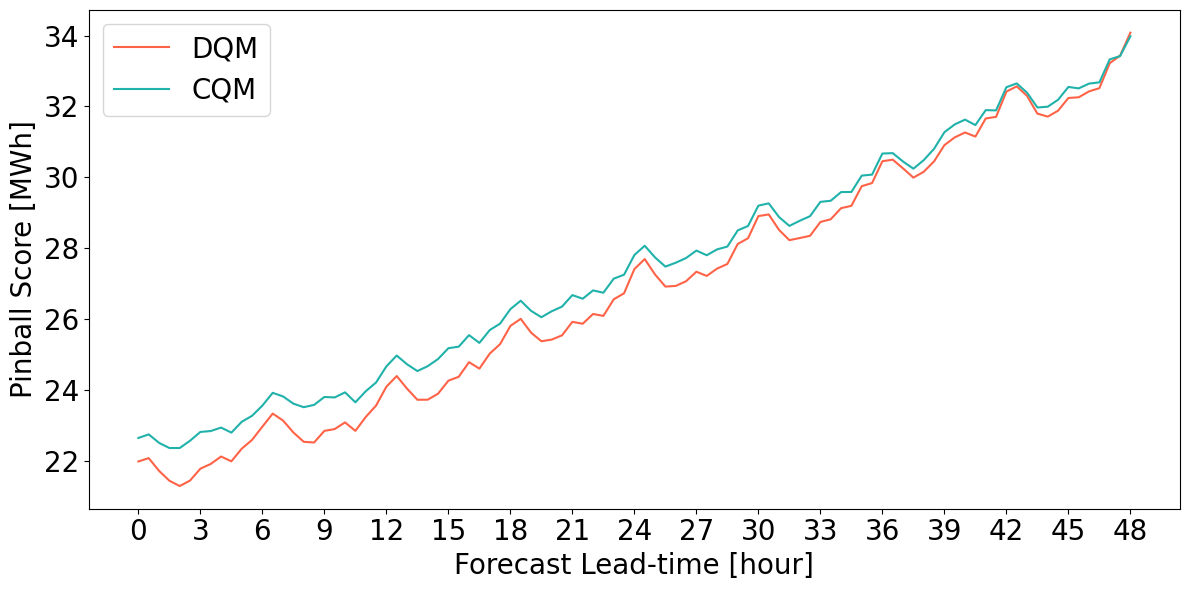

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ピンボール関数
def pinball(y, q, alpha):
    return round((y - q) * alpha * (y >= q) + (q - y) * (1 - alpha) * (y < q),2)

# リードタイムごとのピンボールロスを計算する関数
def pinball_score(df):
    seasons = ['spring', 'summer', 'autumn', 'winter']
    score = []
    for quantile in range(10, 100, 10):
        alpha = quantile / 100
        q = df[[f"{season}_q{quantile}" for season in seasons]].mean(axis=1)
        y = df["total_generation_MWh"]
        pinball_loss = pinball(y, q, alpha).mean()
        score.append(pinball_loss)
    return np.mean(score)

# DQM, Seasonal
modelling_table1 = pd.read_csv("analyzed_data_sea.csv")
modelling_table1['valid_datetime'] = pd.to_datetime(modelling_table1['valid_datetime'])
modelling_table1['ref_datetime'] = pd.to_datetime(modelling_table1['ref_datetime'])
modelling_table1['lead_time'] = (modelling_table1['valid_datetime'] - modelling_table1['ref_datetime']).dt.total_seconds() / 3600
forecast_performance1 = modelling_table1.groupby('lead_time').apply(pinball_score)

# CQM, Seasonal
modelling_table2 = pd.read_csv("analyzed_data_sep_sea.csv")
modelling_table2['valid_datetime'] = pd.to_datetime(modelling_table2['valid_datetime'])
modelling_table2['ref_datetime'] = pd.to_datetime(modelling_table2['ref_datetime'])
modelling_table2['lead_time'] = (modelling_table2['valid_datetime'] - modelling_table2['ref_datetime']).dt.total_seconds() / 3600
forecast_performance2 = modelling_table2.groupby('lead_time').apply(pinball_score)

# グラフの描画
plt.figure(figsize=(12, 6))
ax = forecast_performance1.plot(label='DQM', color='#FF6347')
forecast_performance2.plot(ax=ax, label='CQM', color='#20B2AA')
ax.set_ylabel('Pinball Score [MWh]', fontsize=20)
ax.set_xlabel('Forecast Lead-time [hour]', fontsize=20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=3))
plt.tick_params(axis='both', labelsize=20)
ax.legend(fontsize=20)
plt.tight_layout()
plt.show()

/var/folders/39/jc66nmzj1ds6kh72kmdgnzn40000gn/T/ipykernel_1574/3601134350.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


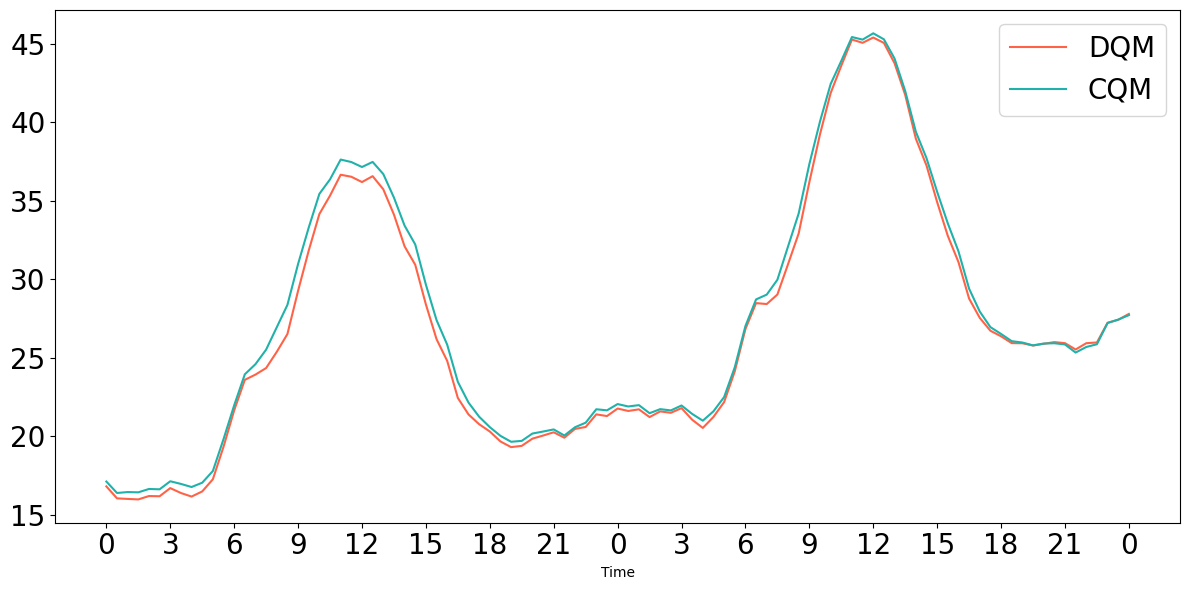

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# ピンボールロスを計算する関数
def pinball(y, q, alpha):
    return round((y - q) * alpha * (y >= q) + (q - y) * (1 - alpha) * (y < q), 2)

# リードタイムごとのピンボールロスを計算する関数（季節性）
def pinball_score_seasonal(df):
    seasons = ['spring', 'summer', 'autumn', 'winter']
    score = []
    for quantile in range(10, 100, 10):
        alpha = quantile / 100
        q = df[[f"{season}_q{quantile}" for season in seasons]].mean(axis=1)
        y = df["total_generation_MWh"]
        pinball_loss = pinball(y, q, alpha).mean()
        score.append(pinball_loss)
    return np.mean(score)

# DQM, Seasonal
modelling_table1_s = pd.read_csv("analyzed_data_sea.csv")
modelling_table1_s['valid_datetime'] = pd.to_datetime(modelling_table1_s['valid_datetime'])
modelling_table1_s['ref_datetime'] = pd.to_datetime(modelling_table1_s['ref_datetime'])
modelling_table1_s = modelling_table1_s[modelling_table1_s['ref_datetime'].dt.time == pd.Timestamp('00:00:00').time()]
modelling_table1_s['lead_time'] = (modelling_table1_s['valid_datetime'] - modelling_table1_s['ref_datetime']).dt.total_seconds() / 3600
forecast_performance1_s = modelling_table1_s.groupby('lead_time').apply(pinball_score_seasonal)

# CQM, Seasonal
modelling_table2_s = pd.read_csv("analyzed_data_sep_sea.csv")
modelling_table2_s['valid_datetime'] = pd.to_datetime(modelling_table2_s['valid_datetime'])
modelling_table2_s['ref_datetime'] = pd.to_datetime(modelling_table2_s['ref_datetime'])
modelling_table2_s = modelling_table2_s[modelling_table2_s['ref_datetime'].dt.time == pd.Timestamp('00:00:00').time()]
modelling_table2_s['lead_time'] = (modelling_table2_s['valid_datetime'] - modelling_table2_s['ref_datetime']).dt.total_seconds() / 3600
forecast_performance2_s = modelling_table2_s.groupby('lead_time').apply(pinball_score_seasonal)

# グラフの描画
plt.figure(figsize=(12, 6))

# 各曲線の色を選定
colors = {
    'DQM, Seasonal': '#FF6347', 
    'CQM, Seasonal': '#20B2AA'  
}

forecast_performance1_s.plot(label='DQM', color=colors['DQM, Seasonal'])
forecast_performance2_s.plot(label='CQM', color=colors['CQM, Seasonal'])

#plt.ylabel('Pinball Score [MWh]', fontsize=20)
plt.xlabel('Time', fontsize=10)

# X軸の目盛りの設定
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=3))

# カスタム目盛りラベルの定義
labels = [str(int(x) % 24) for x in ax.get_xticks()]
ax.set_xticklabels(labels)

plt.tick_params(axis='both', labelsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()
